In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import shapiro, kstest, probplot
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot


### Carga dos dados

In [2]:
# abrir o dataset
df_pontuacao=pd.read_csv('./datasets/pontuacao_teste.csv')

In [3]:
df_pontuacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   horas_estudo     101 non-null    float64
 1   pontuacao_teste  101 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


In [4]:
# visualizar topo do dataset
df_pontuacao.head(10)

,horas_estudo,pontuacao_teste
0,1.1,30
1,2.0,55
2,2.5,60
3,3.6,75
4,4.2,85
5,5.0,100
6,5.5,115
7,6.1,120
8,6.5,130
9,7.2,145


In [5]:
df_pontuacao.tail(10)

,horas_estudo,pontuacao_teste
91,44.9,750
92,45.1,755
93,45.3,760
94,45.5,765
95,45.7,770
96,46.0,780
97,46.2,785
98,46.4,790
99,46.6,795
100,46.9,800


### EDA

In [6]:
# EDA - analise exploratoria de dados
# medidas estatisitcas das variaveis
df_pontuacao.describe()

,horas_estudo,pontuacao_teste
count,101.000000,101.000000
mean,28.604950,455.000000
std,14.116128,221.385411
min,1.100000,30.000000
25%,16.500000,270.000000
50%,30.900000,465.000000
75%,41.800000,655.000000
max,46.900000,800.000000


<Axes: xlabel='horas_estudo', ylabel='pontuacao_teste'>

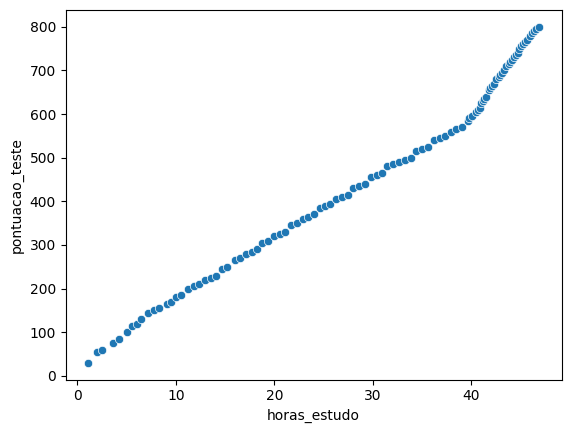

In [8]:
# plot de dispersão
# X = horas de estudo
# Y = pontuacao
sns.scatterplot(data=df_pontuacao,x='horas_estudo',y='pontuacao_teste')

<Axes: ylabel='horas_estudo'>

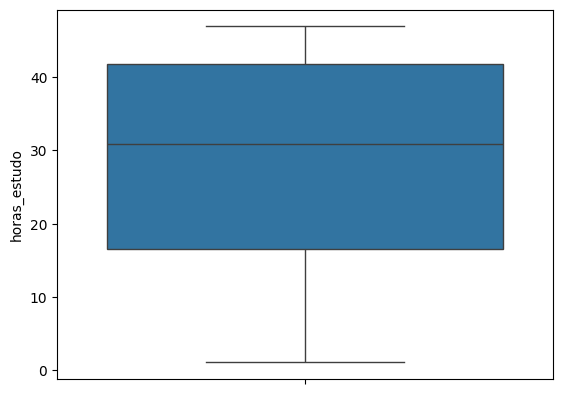

In [10]:
# verificar outliers
sns.boxplot(df_pontuacao, y='horas_estudo')

<Axes: ylabel='pontuacao_teste'>

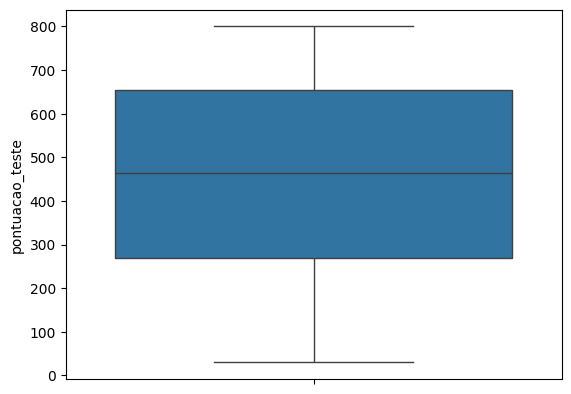

In [11]:
sns.boxplot(df_pontuacao, y='pontuacao_teste')


### Correlação linear 

<Axes: >

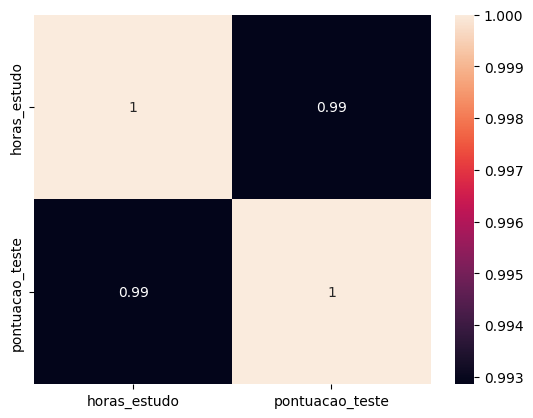

In [17]:
sns.heatmap(df_pontuacao.corr('pearson'),annot=True)

<Axes: >

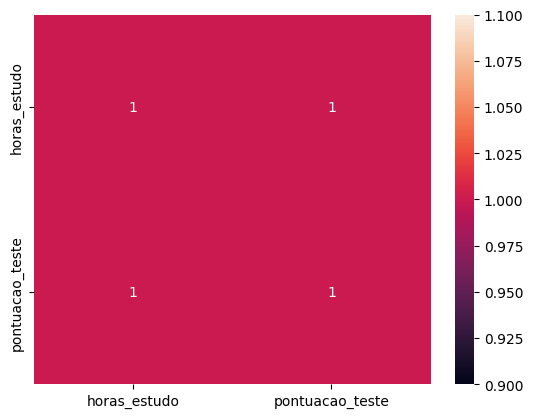

In [19]:
# correlação de spearman para variaveis não lineares
sns.heatmap(df_pontuacao.corr('spearman'),annot=True)

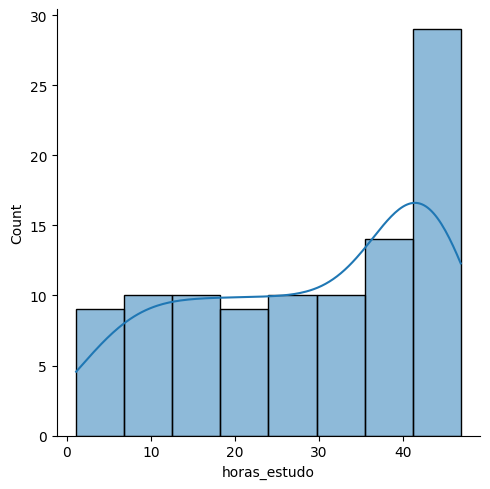

In [20]:
# histograma das variaveis
sns.displot(df_pontuacao['horas_estudo'],kde=True)

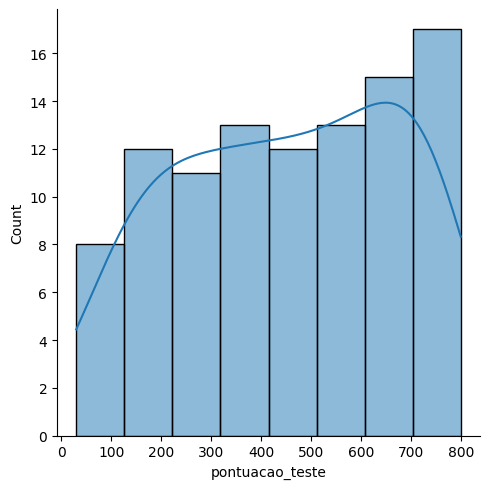

In [21]:
# histograma das variaveis
sns.displot(df_pontuacao['pontuacao_teste'],kde=True)

### treinar modelo

In [22]:
# dividir dados em treino e teste
# quantos temos apenas uma variavel feature precisamos ajustar o shape
X = df_pontuacao['horas_estudo'].values.reshape(-1,1)
y = df_pontuacao['pontuacao_teste'].values.reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=50)

In [23]:
# instanciar o modelo a ser treinado
reg_model = LinearRegression()

In [24]:
# treinar o modelo
reg_model.fit(X_train,y_train)

LinearRegression()

In [26]:
# imprimir equacao da reta 
# y = ax + b
print("A equação da reta é f(y) = {:4f}x + {:4f}".format(reg_model.coef_[0][0],reg_model.intercept_[0]))

A equação da reta é f(y) = 15.642619x + 8.476601


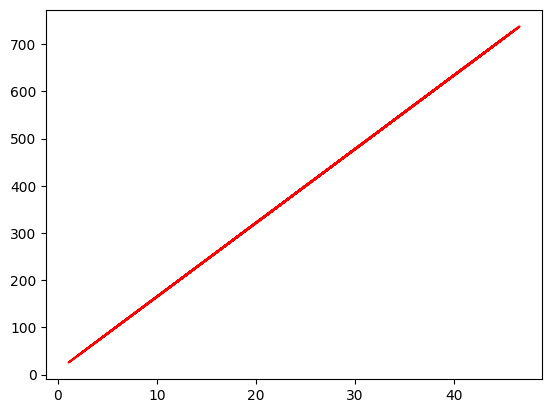

In [36]:
# plotar a reta f(y) = 15.642619x + 8.476601
plt.plot(X_train,reg_model.coef_[0][0]*X_train + reg_model.intercept_[0],color='red')



# validar modelo metricas

In [37]:
# predição dos valores com base no conjunto de testes
y_pred = reg_model.predict(X_test)

In [40]:
# calcular métrica R-squared ou coeficiente de determinação
# R2 representa a proporção na variação na variável dependente que é explicada pela variável independente
from sklearn.metrics import r2_score, mean_absolute_error
r2_score(y_test,y_pred)

0.9828400452912442

In [42]:
# verificar a normalidade dos resíduos
# Calcular MAE (Mean Absolute Error) - media dos resíduos
# MAE = Média (y_test - y_pred)
# MAE é menos sensivel a outliers
mean_absolute_error(y_test,y_pred)

22.957470277134615

In [43]:
# calcular o MSE (Mean Squared Error) - media dos resíduos ao quadrado
# MSE = Média (y_test - y_pred)^2
# MSE é mais sensivel a outliers
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)

766.9972992416427

In [44]:
# Calcular o RMSE (Root Mean Squared Error) - raiz quadrada do MSE
# RMSE = sqrt(MSE)
mean_squared_error(y_test,y_pred,squared=False)

/home/fernandomarca/.local/share/virtualenvs/regracao_simples-FftmT8sw/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


27.69471608884342

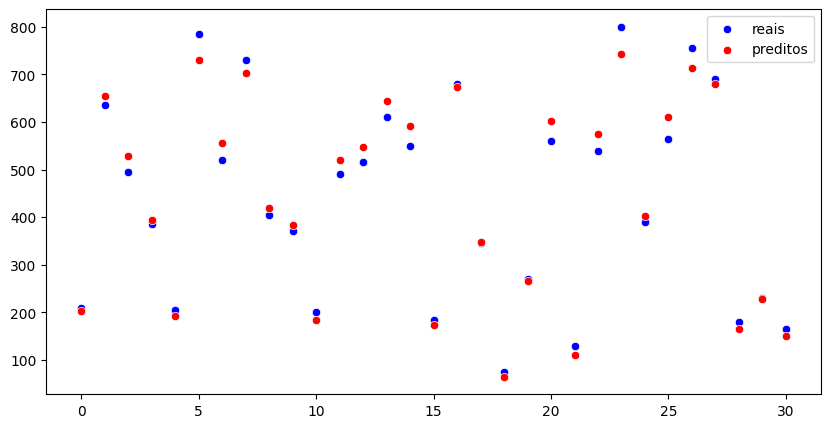

In [54]:
# Analise grafica
x_axis=range(len(y_test))
plt.figure(figsize=(10,5))
sns.scatterplot(x=x_axis,y=y_test.reshape(-1),color='blue',label='reais')

# Analise grafica
sns.scatterplot(x=x_axis,y=y_pred.reshape(-1),color='red',label='preditos')
plt.legend()
plt.show()


### Análise de resíduos

In [55]:
# calcular os resíduos
residuos = y_test - y_pred

In [56]:
# calcular os resíduos padronizados (standardization)
# Para cada elemento de um conjunto (X - média) / desvio padrão
from scipy.stats import zscore
residuos_padronizados = zscore(residuos)

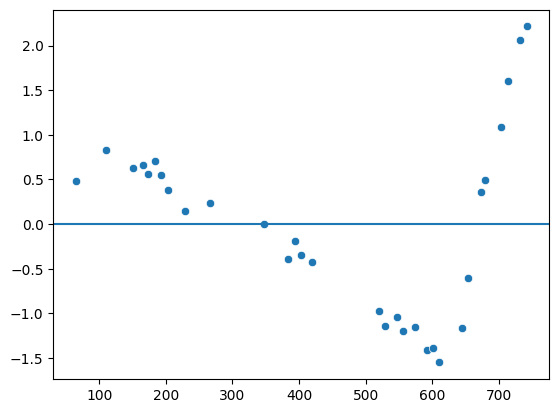

In [57]:
# verificar a linearidade do modelo
# Se os residuos estiver entre -2 e 2 o modelo é linear


# verificar homogeneidade das variancias (homocedasticidade)
# Valores estiver em torno da reta, temos homocedasticidade, caso contrário heterocedasticidade
sns.scatterplot(x=y_pred.reshape(-1),y=residuos_padronizados.reshape(-1))
plt.axhline(y=0)

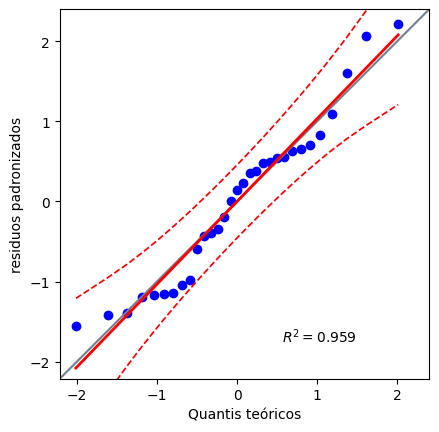

In [58]:
# checar se residuos seguem uma distribuição normal
# QQ (Quantile-Quantile) plot, avalia se uma amostra segue uma distribuição normal
import pingouin as pg
pg.qqplot(residuos_padronizados,dist='norm',confidence=0.95)
plt.xlabel('Quantis teóricos')
plt.ylabel('residuos padronizados')
plt.show()

In [60]:
# teste de normalidade - Shapiro-Wilk
# H0 = a amostra é normal
# H1 = a amostra não é normal
# Se o p-valor > que 0.05 aceitamos a hipotese nula
stat_shapiro,p_valor_shapiro=shapiro(residuos.reshape(-1))
print("Estatistica do teste: {} e P-Valor: {}".format(stat_shapiro,p_valor_shapiro))

Estatistica do teste: 0.9500532226161759 e P-Valor: 0.15663817850304967


In [61]:
# teste de normalidade - Kolmogorov-Smirnov
# H0 = a amostra é normal
# H1 = a amostra não é normal
# Se o p-valor > que 0.05 aceitamos a hipotese nula
stat_ks,p_valor_ks=kstest(residuos.reshape(-1),'norm')
print("Estatistica do teste: {} e P-Valor: {}".format(stat_ks,p_valor_ks))

Estatistica do teste: 0.48355808450512827 e P-Valor: 3.395368995814077e-07


### Predições com o modelo

In [66]:
# se eu estudei 30.4 horas, qual a pontuação esperada?
reg_model.predict([[30.4]])

array([[484.01220436]])

In [67]:
# se eu quiser tirar 600 pontos no teste, quantas horas devo estudar?
# y = ax + b 
# y -b = ax
# (y-b)/a = x
# x = (y-b)/a
(600 - reg_model.intercept_[0])/reg_model.coef_[0][0]

37.81485802710669

### Salvar o modelo para usar depois


In [68]:
import joblib
joblib.dump(reg_model,'./modelo_pontuacao.pkl')

['./modelo_pontuacao.pkl']